In [4]:
import pandas as pd
mcdonalds = pd.read_csv('mcdonalds.csv')

In [5]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [6]:
mcdonalds.shape

(1453, 15)

In [7]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
from sklearn.preprocessing import LabelEncoder
def label_encode(x):
    mcdonalds[x]=LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds
data = mcdonalds.columns[0:11]
for i in data:
    label_encode(i)
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [9]:
mcdonalds_new=mcdonalds.loc[:,data]
mcdonalds_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
round(mcdonalds_new.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [11]:
MD_X=mcdonalds_new.values
MD_X

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data=preprocessing.scale(MD_X)
pca=PCA(n_components=11)
pc=pca.fit_transform(MD_X)
names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
MD_pca=pd.DataFrame(data=pc,columns=names)
MD_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [13]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [14]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [15]:
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable']=mcdonalds_new.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


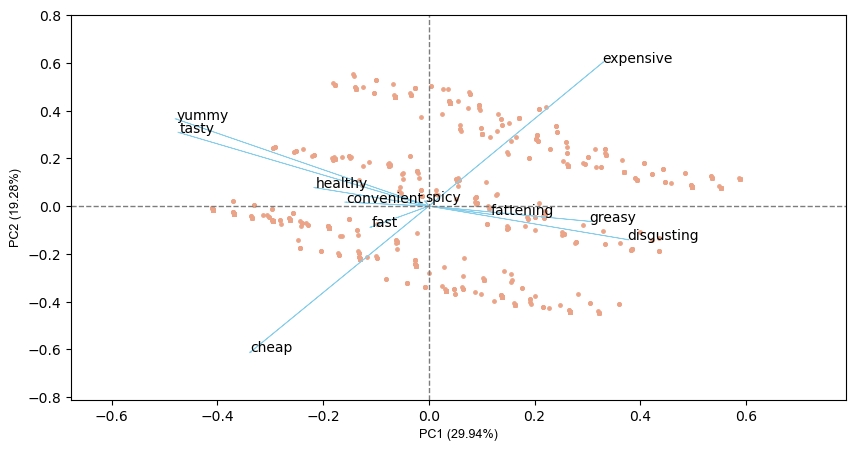

In [16]:
from bioinfokit.visuz import cluster
pca_score=PCA().fit_transform(MD_X)
cluster.biplot(cscore=pca_score,loadings=loadings,labels=mcdonalds.columns.values,var1=round(pca.explained_variance_ratio_[0]*100,2),var2=round(pca.explained_variance_ratio_[1]*100,2),show=True,dim=(10,5))

In [17]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4, init='k-means++', random_state=123).fit(mcdonalds_new)
mcdonalds['cluster_num']=km.labels_
print(km.labels_)
print(km.inertia_)
print(km.n_iter_)
print(km.cluster_centers_)

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[2 3 3 ... 3 1 0]
1603.0604440558916
6
[[0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]]


In [18]:
from collections import Counter
Counter(km.labels_)

Counter({2: 304, 3: 323, 1: 580, 0: 246})

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

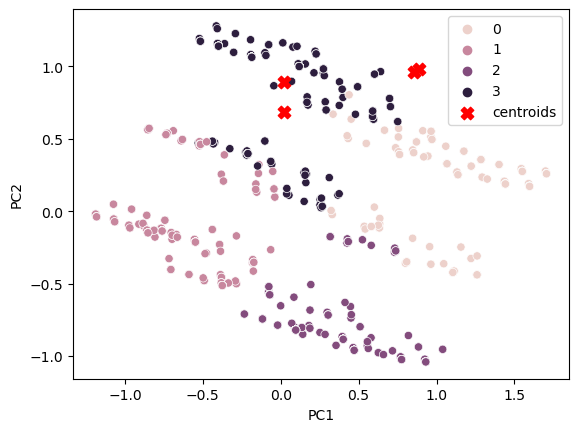

In [20]:
sns.scatterplot(data=MD_pca,x="PC1",y="PC2",hue=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
marker="X",c="r",s=80,label="centroids")
plt.legend()
plt.show()

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab=pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Like'])
crosstab=crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,89,28,30,19,13,39,14,6,8,0,0
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,5,3,7,6,7,36,42,60,66,47,44


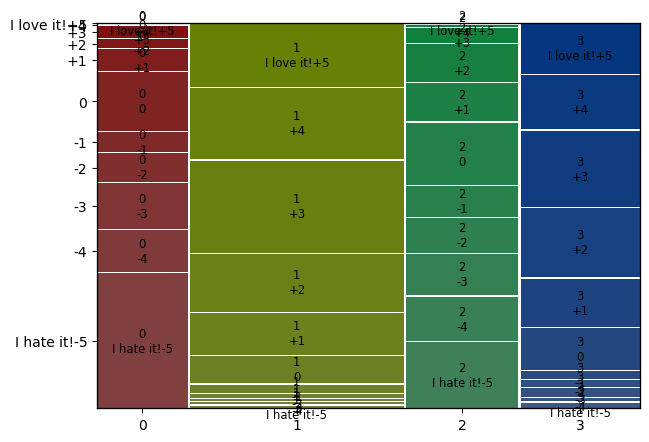

In [22]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab.stack())
plt.show()

In [23]:
crosstab_gender=pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,106,140
1,349,231
2,179,125
3,154,169


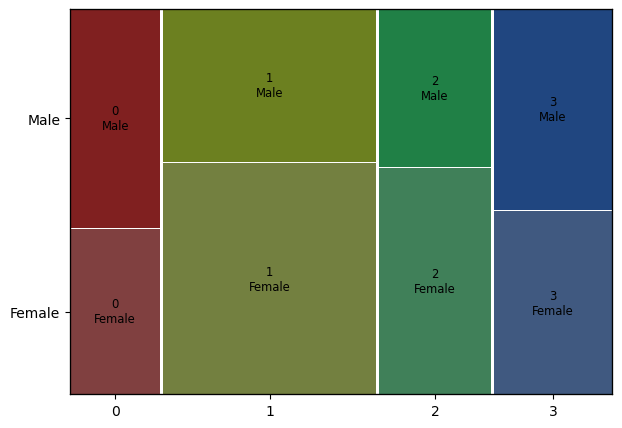

In [24]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

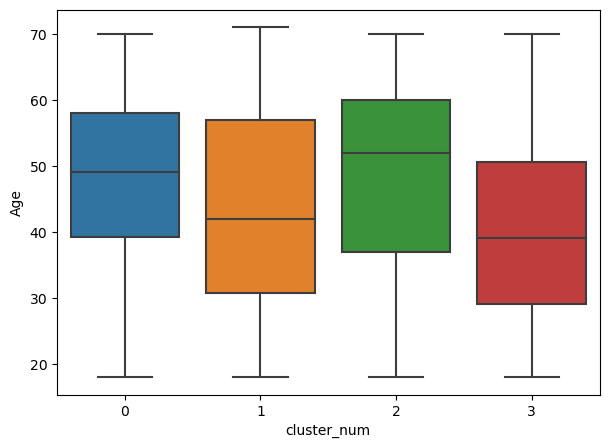

In [25]:
sns.boxplot(x="cluster_num",y="Age",data=mcdonalds)

In [26]:
mcdonalds['VisitFrequency']=LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit=mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit=visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.654472
1,1,2.584483
2,2,2.822368
3,3,2.547988


In [27]:
mcdonalds['Like']=LabelEncoder().fit_transform(mcdonalds['Like'])
like=mcdonalds.groupby('cluster_num')['Like'].mean()
like=like.to_frame().reset_index()
like

,cluster_num,Like
0,0,6.739837
1,1,3.794828
2,2,5.430921
3,3,3.798762


In [28]:
mcdonalds['Gender']=LabelEncoder().fit_transform(mcdonalds['Gender'])
gender=mcdonalds.groupby('cluster_num')['Gender'].mean()
gender=gender.to_frame().reset_index()
gender

,cluster_num,Gender
0,0,0.569106
1,1,0.398276
2,2,0.411184
3,3,0.523220


In [29]:
segment=gender.merge(like,on='cluster_num',how='left').merge(visit,on='cluster_num',how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.569106,6.739837,2.654472
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.523220,3.798762,2.547988


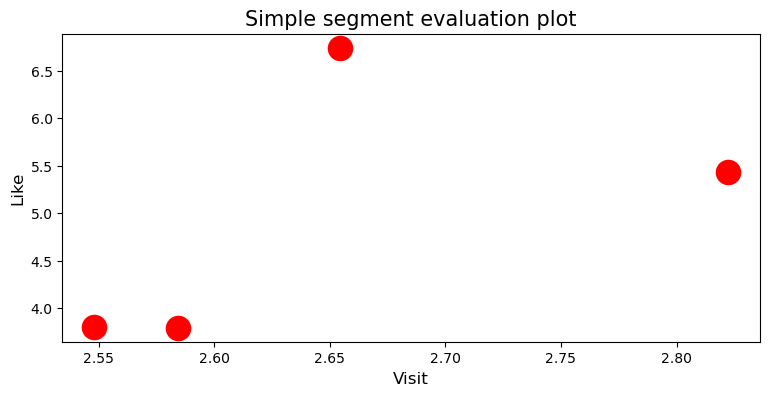

In [30]:
plt.figure(figsize=(9,4))
sns.scatterplot(x="VisitFrequency",y="Like",data=segment,s=400,color="r")
plt.title("Simple segment evaluation plot",fontsize=15)
plt.xlabel("Visit",fontsize=12)
plt.ylabel("Like",fontsize=12)
plt.show()

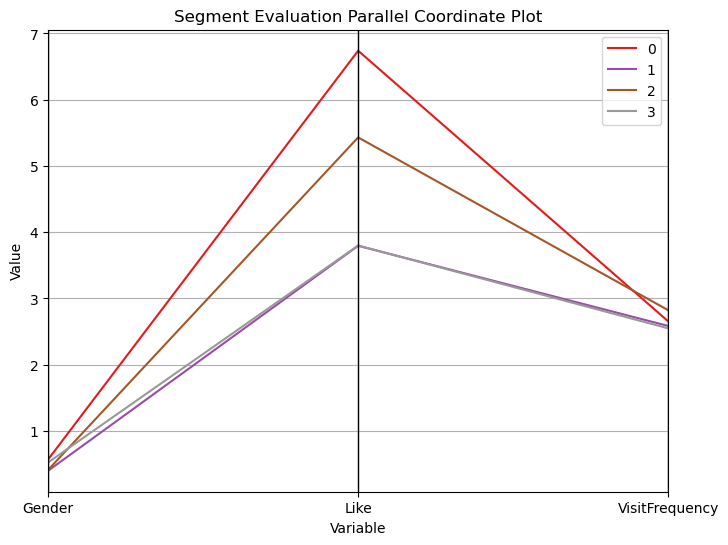

In [31]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8, 6))
parallel_coordinates(segment, 'cluster_num', colormap='Set1')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Segment Evaluation Parallel Coordinate Plot')
plt.show()